# Comparing Run 103 and Run 104

Run 103 is baseline. Run 104 has 32 ns delay cable connected to cable 7 (Leftmost Channel - *channel 1* of Tray 4)

In [1]:
from MuonDataFrame import *
file1 = "processed_data/events_data_frame_103.h5"
file2 = "processed_data/events_data_frame_104.h5"

mdfo3 = MuonDataFrame(file1, isNew=False, d1="last") #Muon Data Frame Object 
mdf3 = mdfo3.events_df

mdfo4 = MuonDataFrame(file2, isNew=False, d1="last") #Muon Data Frame Object 
mdf4 = mdfo4.events_df

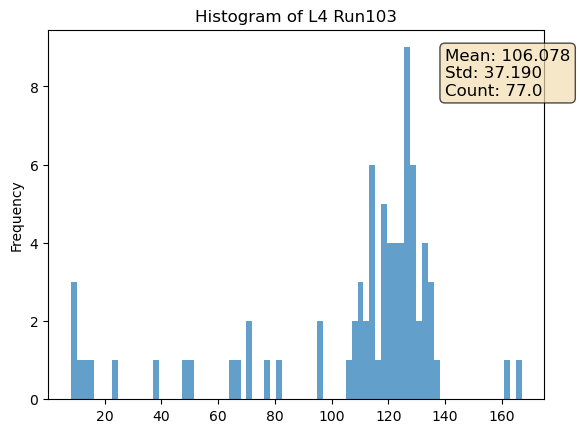

In [6]:
mdfo3.getHistogram("L4",title="Run103",nbins=50)

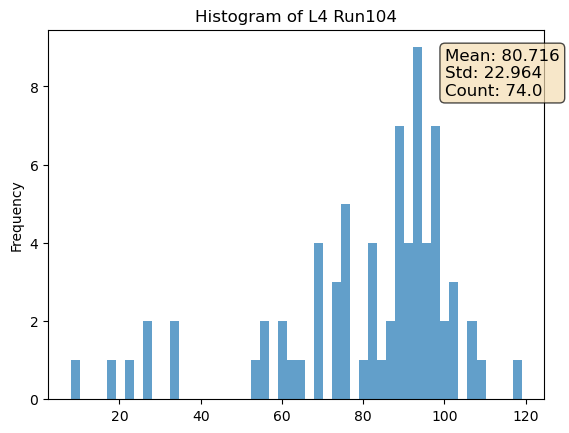

In [8]:
mdfo4.getHistogram("L4",title="Run104",nbins=50)

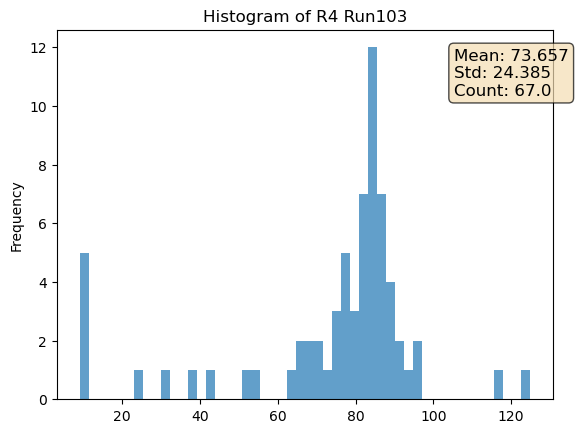

In [14]:
mdfo3.getHistogram("R4",title="Run103",nbins=50)

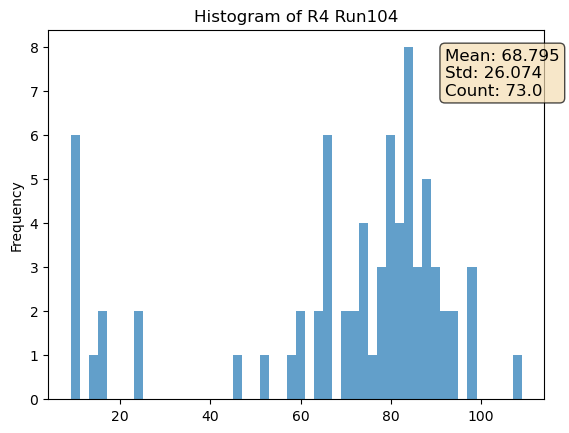

In [15]:
mdfo4.getHistogram("R4",title="Run104",nbins=50)

In [10]:
mu3, std3, c3 = mdfo3.getHisto1DInfo("L4")
print("103: mean: {} and std: {}".format(mu3,std3))

103: mean: 106.07792207792208 and std: 37.19004048686827


In [11]:
mu4, std4, c4 = mdfo4.getHisto1DInfo("L4")
print("104: mean: {} and std: {}".format(mu4,std4))

104: mean: 80.71621621621621 and std: 22.96424873000273


In [16]:
diffL = mu4 - mu3
print("L difference: ", diffL)

L difference:  -25.36170586170587


In [28]:
mdfo3.keepEvents("L4",80,">=")
mdfo4.keepEvents("L4",70,">=")

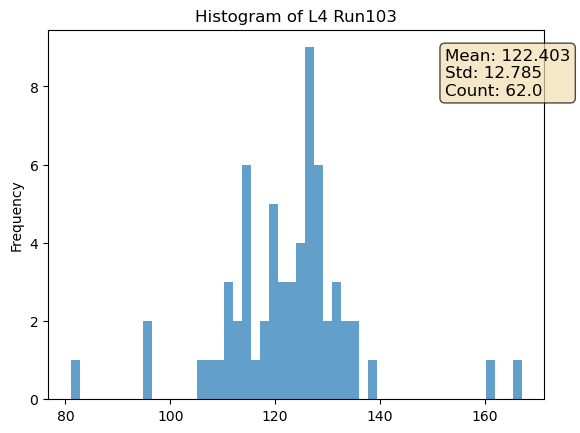

In [29]:
mdfo3.getHistogram("L4",title="Run103",nbins=50)

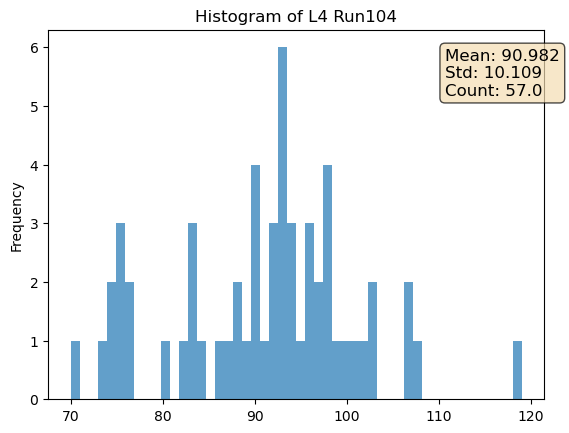

In [30]:
mdfo4.getHistogram("L4",title="Run104",nbins=50)

In [31]:
diff = 122.403 - 90.982
diff

31.421000000000006

# Comparing Run 103 and 105

Run 105 has channels 1 and 3 connected.

In [36]:
file3 = "processed_data/events_data_frame_105.h5"

mdfo5 = MuonDataFrame(file3, isNew=False, d1="last") #Muon Data Frame Object 
mdf5 = mdfo5.events_df

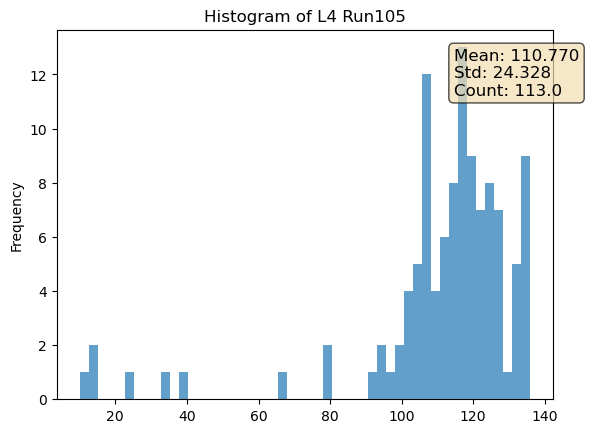

In [37]:
mdfo5.getHistogram("L4",title="Run105",nbins=50)

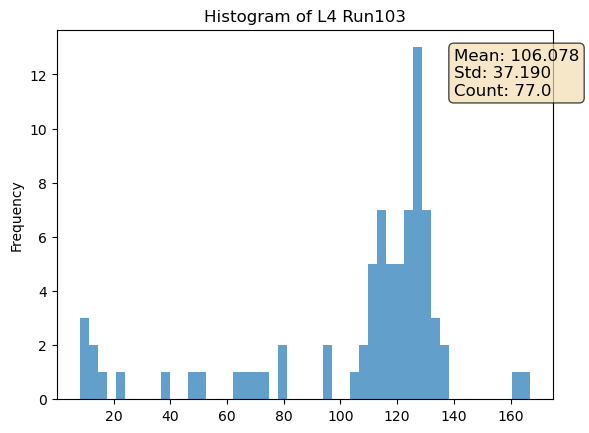

In [38]:
mdfo3.reload()
mdfo3.getHistogram("L4",title="Run103",nbins=50)

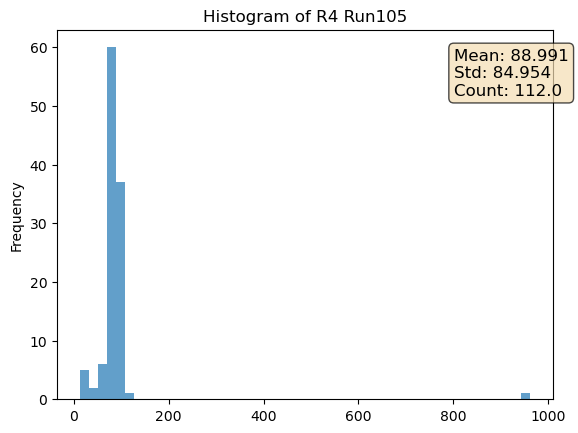

In [46]:
mdfo5.getHistogram("R4",title="Run105",nbins=50)

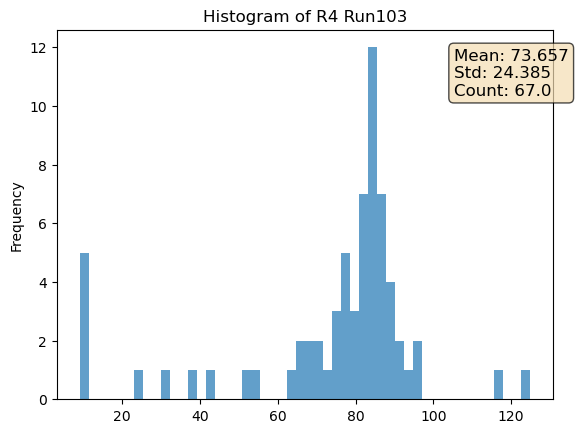

In [47]:
mdfo3.getHistogram("R4",title="Run103",nbins=50)

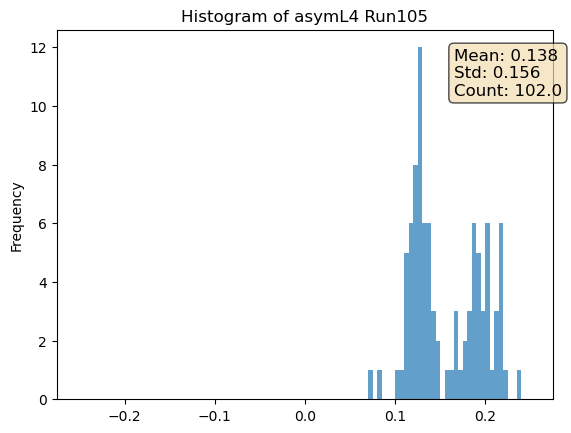

In [43]:
mdfo5.getHistogram("asymL4",title="Run105",nbins=100, range=(-0.25,0.25))

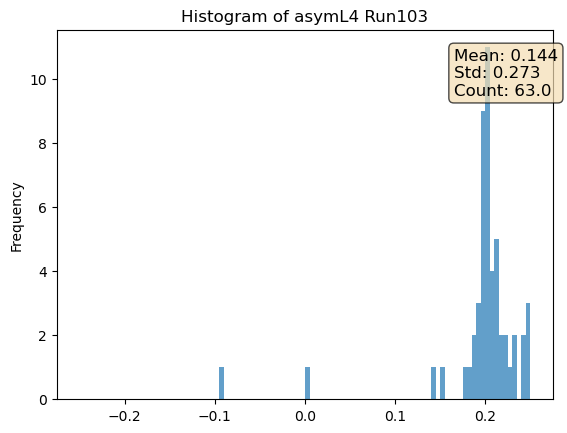

In [44]:
mdfo3.getHistogram("asymL4",title="Run103",nbins=100, range=(-0.25,0.25))

In [82]:
from scipy.signal import find_peaks, peak_prominences

def getHisto(term,df,bins,bw=0.01):
    df[term].plot.hist(bins=bins, density=True)
    plt.title(term)
    plt.show()
    
def getNPHist(df, term, bins, range=(-0.25, 0.25)):
    values = df[term]
    hist, bin_edges = np.histogram(values, bins, range=range)
    bin_edges = bin_edges[1:]
    return hist, bin_edges


def getPeaks(x, prmc, wdth):
    peaks, properties = find_peaks(x, prominence=prmc, width=wdth)
    properties["prominences"], properties["widths"]

    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")

    plt.vlines(x=peaks,
           ymin=x[peaks] - properties["prominences"],
           ymax=x[peaks],
           color="C1")

    plt.hlines(y=properties["width_heights"],
           xmin=properties["left_ips"],
           xmax=properties["right_ips"],
           color="C1")
    plt.show()
    return x[peaks]

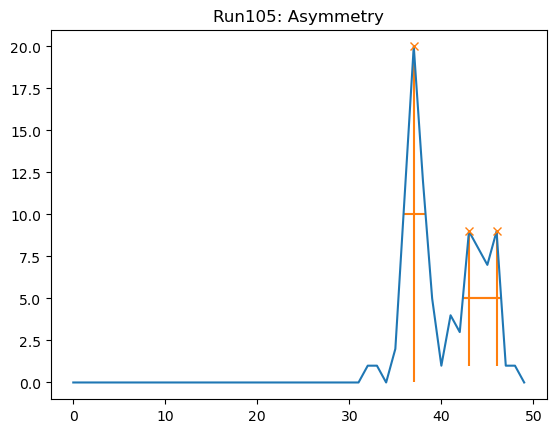

peaks:  [20  9  9]
diff:  11


In [78]:
x = getNPHist(mdf5, "asymL4", 50)[0]
plt.title("Run105: Asymmetry")
peaks = getPeaks(x, 5, 2)
print("peaks: ", peaks)
print("diff: ", max(peaks) - min(peaks))

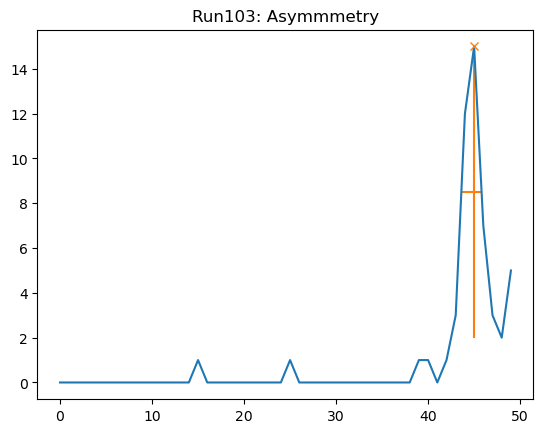

peaks:  [15]


In [72]:
x1 = getNPHist(mdf3, "asymL4", 50)[0]
plt.title("Run103: Asymmmetry")
peaks1 = getPeaks(x1, 5, 2)
print("peaks: ", peaks1)

## TDC Diff

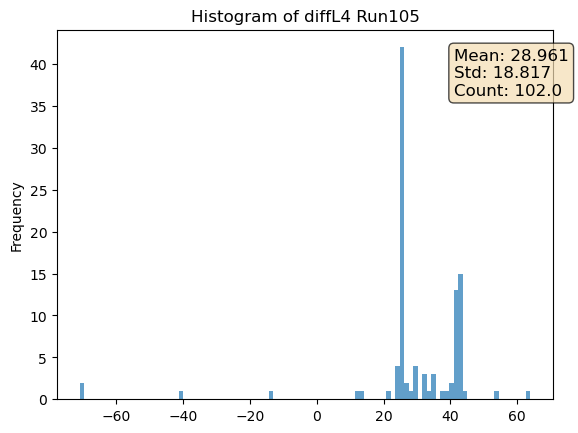

In [84]:
mdfo5.getHistogram("diffL4",title="Run105",nbins=100)

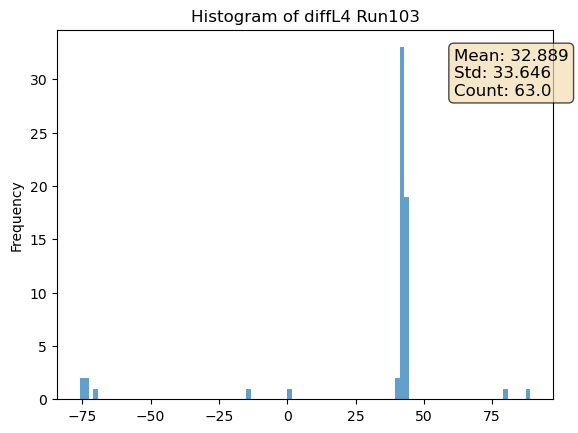

In [93]:
mdfo3.getHistogram("diffL4",title="Run103",nbins=100)

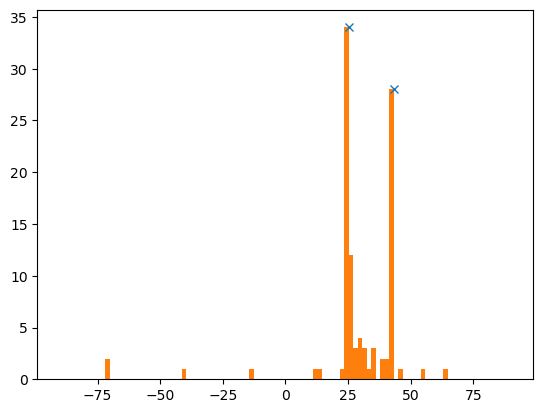

TDC diff:  [25.2 43.2]
diff:  18.000000000000014


In [92]:
values = mdf5.diffL4
bins = 100
hist, bin_edges = np.histogram(values, bins, range=(-90,90))
bin_edges = bin_edges[1:]

peaks, properties = find_peaks(hist,height=10)
plt.plot(bin_edges[peaks], hist[peaks], "x")
plt.hist(values, bins=bins, range=(-90,90))
#plt.plot(bin_edges, hist)
plt.show()

print("TDC diff: ",bin_edges[peaks])
print("diff: ", max(bin_edges[peaks]) - min(bin_edges[peaks]))

# Run 106 (Ch1 and 10)

In [94]:
file4 = "processed_data/events_data_frame_106.h5"

mdfo10 = MuonDataFrame(file4, isNew=False, d1="last") #Muon Data Frame Object 
mdf10 = mdfo10.events_df

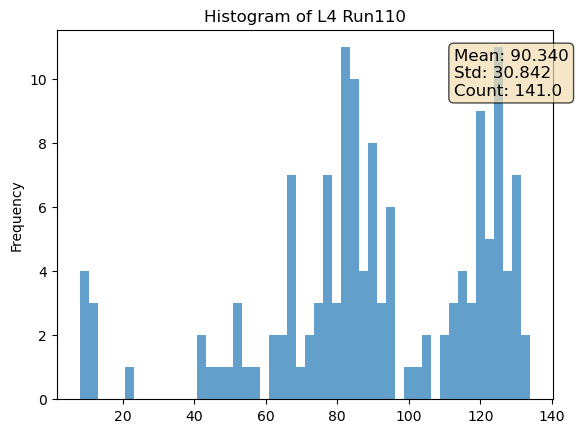

In [96]:
mdfo10.getHistogram("L4",title="Run110",nbins=50)

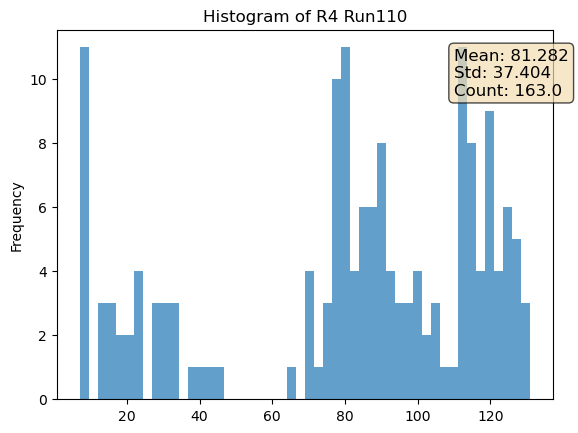

In [97]:
mdfo10.getHistogram("R4",title="Run110",nbins=50)

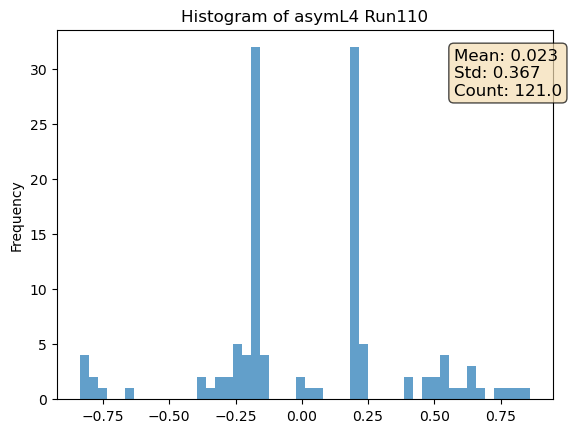

In [98]:
mdfo10.getHistogram("asymL4",title="Run110",nbins=50)

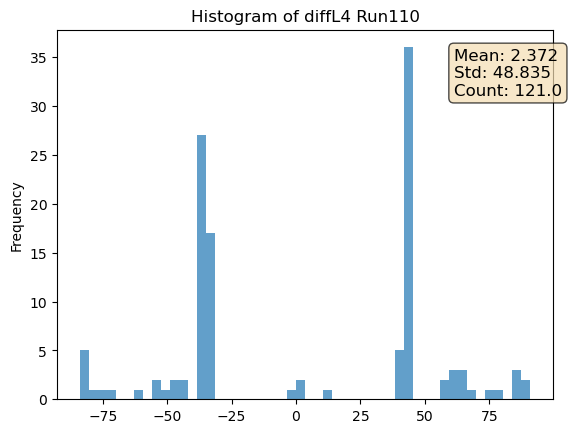

In [99]:
mdfo10.getHistogram("diffL4",title="Run110",nbins=50)

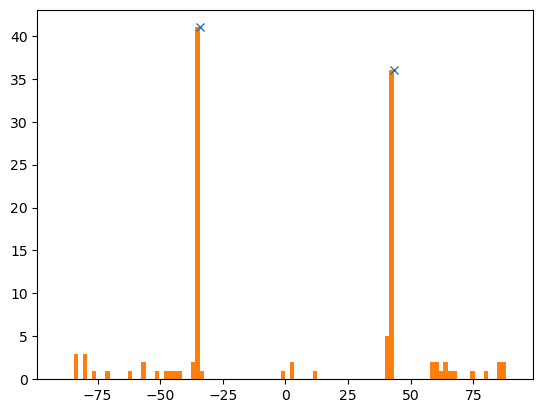

TDC diff:  [-34.2  43.2]
diff:  77.4


In [100]:
values = mdf10.diffL4
bins = 100
hist, bin_edges = np.histogram(values, bins, range=(-90,90))
bin_edges = bin_edges[1:]

peaks, properties = find_peaks(hist,height=10)
plt.plot(bin_edges[peaks], hist[peaks], "x")
plt.hist(values, bins=bins, range=(-90,90))
#plt.plot(bin_edges, hist)
plt.show()

print("TDC diff: ",bin_edges[peaks])
print("diff: ", max(bin_edges[peaks]) - min(bin_edges[peaks]))

In [110]:
mdfo10.keepEvents("L4",70,">=")

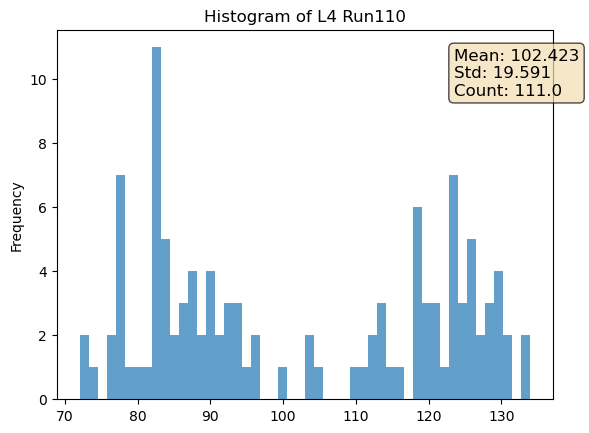

In [111]:
mdfo10.getHistogram("L4",title="Run110",nbins=50)

In [114]:
l4_tdc = mdfo10.events_df.L4

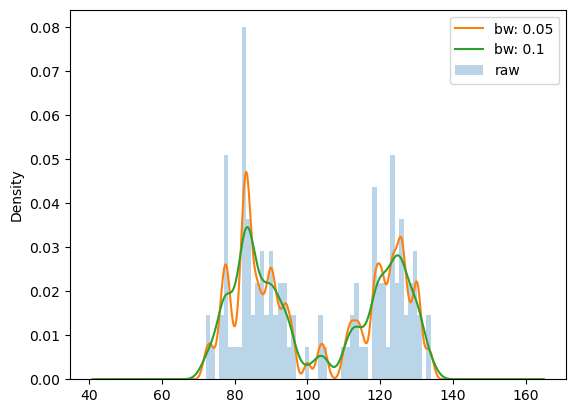

In [160]:
mdfo10.events_df.L4.plot(kind="hist",density="true",bins=50,label="raw",alpha=0.3)
ax=mdfo10.events_df.L4.plot.kde(bw_method=0.05,label="bw: 0.05")
ax1=mdfo10.events_df.L4.plot.kde(bw_method=0.1,label="bw: 0.1")
plt.legend()
plt.show()

In [190]:
xp = ax.get_children()[-12]._x
yp = ax.get_children()[-12]._y

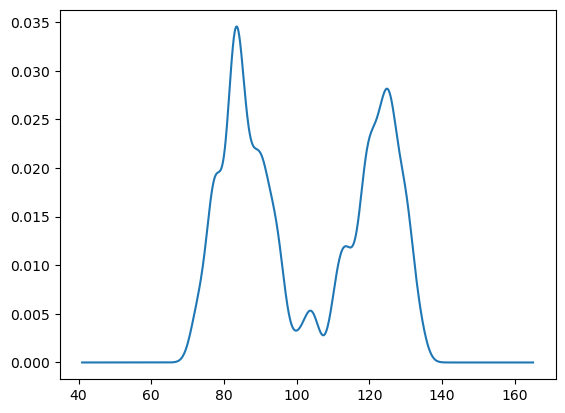

47

In [191]:
plt.plot(xp,yp)
plt.show()
diff1 = 128 - 81
diff1

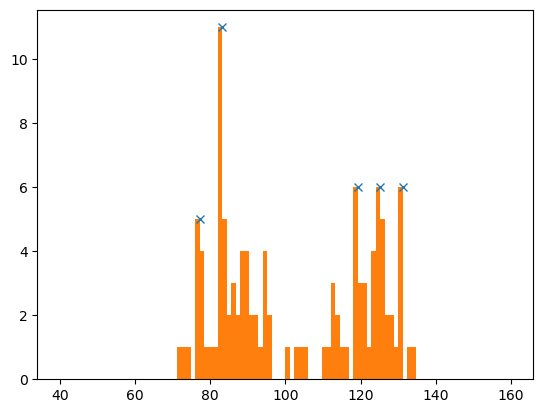

TDC diff:  [ 77.2  83.2 119.2 125.2 131.2]
diff:  54.0


In [169]:
values = mdfo10.events_df.L4
bins = 100
hist, bin_edges = np.histogram(values, bins, range=(40,160))
bin_edges = bin_edges[1:]

peaks, properties = find_peaks(hist,height=5)
plt.plot(bin_edges[peaks], hist[peaks], "x")
plt.hist(values, bins=bins, range=(40,160))
#plt.plot(bin_edges, hist)
plt.show()

print("TDC diff: ",bin_edges[peaks])
print("diff: ", max(bin_edges[peaks]) - min(bin_edges[peaks]))

In [175]:
diff =  119.2 - 83.2
diff

36.0

In [182]:
p1 = sum(bin_edges[peaks][:2])/2 
p2 = sum(bin_edges[peaks][2:])/3
diff = p2 - p1
diff

45.000000000000014

# Conclusion:

We have established that that the TDC's indeed are reading $0.5$ ns per count and also that each wire connected to the PMT has a delay anywhere between $1.5$ to $2.5$ ns.